  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972   
1                 6186    

c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


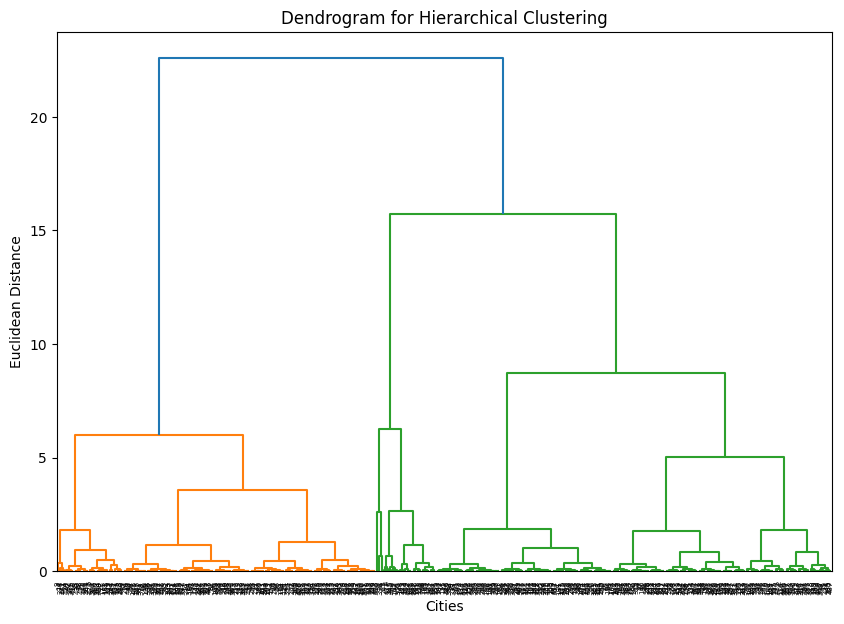

Cluster assignments:
   name_of_city  effective_literacy_rate_total  Cluster
0             0                          79.86        0
1             1                          91.99        1
2             2                          80.51        0
3             3                          83.46        0
4             4                          68.38        2


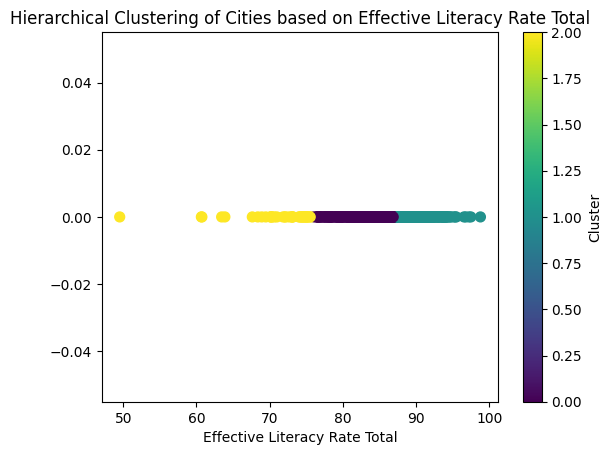

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Step 1: Load the dataset
data = pd.read_csv('cities_r2.csv')

# Step 2: Inspect the first few rows to understand the data structure
print(data.head())

# Step 3: Data Preprocessing

# Handle missing values (drop rows with missing values for simplicity)
data = data.dropna(subset=['effective_literacy_rate_total'])

# If there are categorical columns, apply Label Encoding (example for 'name_of_city' if it's categorical)
if 'name_of_city' in data.columns:
    label_encoder = LabelEncoder()
    data['name_of_city'] = label_encoder.fit_transform(data['name_of_city'])

# Step 4: Feature Selection (we will use 'effective_literacy_rate_total' for clustering)
X = data[['effective_literacy_rate_total']]

# Step 5: Feature Scaling (standardize the data, if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply Hierarchical Clustering
# Create a hierarchical clustering model
# Using the 'ward' method to minimize variance within clusters
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model to the data
data['Cluster'] = hc.fit_predict(X_scaled)

# Step 7: Visualize the Dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cities')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 8: Output the resulting clusters
print("Cluster assignments:")
print(data[['name_of_city', 'effective_literacy_rate_total', 'Cluster']].head())

# Optional: Visualize the clusters (if more features are used for clustering, scatter plot can be extended)
plt.scatter(data['effective_literacy_rate_total'], np.zeros_like(data['effective_literacy_rate_total']), 
            c=data['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Effective Literacy Rate Total')
plt.title('Hierarchical Clustering of Cities based on Effective Literacy Rate Total')
plt.show()
